In [11]:
from act.feature_model import DefaultSummaryModel
from act.optim import SBIOptimizer, NaiveLinearOptimizer, LinearOptimizer

import torch
import numpy as np
import pandas as pd

In [2]:
# Load observed data
data = torch.tensor(pd.read_csv("example_data.csv", header = None).to_numpy()).float()

# Reshape to (num_current_injections, 1024) for convenience
data = data.reshape((5, 1024))

#### Naive Linear Optimizer

In [3]:
# Define optimizer
naive_opt = NaiveLinearOptimizer(config_file = "config.json")

# Optimize
naive_estimates = naive_opt.optimize(observed_data = data, num_epochs = 100)

#### Linear Optimizer

In [4]:
# Define feature model
feature_model = DefaultSummaryModel(num_summary_features = 8, use_statistics = True)

Total number of summary features: 11


In [5]:
# Define optimizer
linopt = LinearOptimizer(config_file = "config.json")

# Optimize
linopt_estimates = linopt.optimize(feature_model = feature_model, observed_data = data, num_summary_features = 11, 
                                   num_epochs = 100, num_prediction_rounds = 50)

[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.


#### SBI Optimizer

In [6]:
# Define feature model
feature_model = DefaultSummaryModel(num_summary_features = 8, use_statistics = True)

Total number of summary features: 11


In [7]:
# Define optimizer
sbiopt = SBIOptimizer(config_file = "config.json")

# Optimize
sbi_estimates = sbiopt.optimize(feature_model = feature_model, observed_data = data, num_samples = 1)

Neural network successfully converged after 326 epochs.
Neural network successfully converged after 70 epochs.
Neural network successfully converged after 22 epochs.
Neural network successfully converged after 398 epochs.
Neural network successfully converged after 61 epochs.


#### Test

In [12]:
from act.metrics import mse_score, correlation_score, plot_score

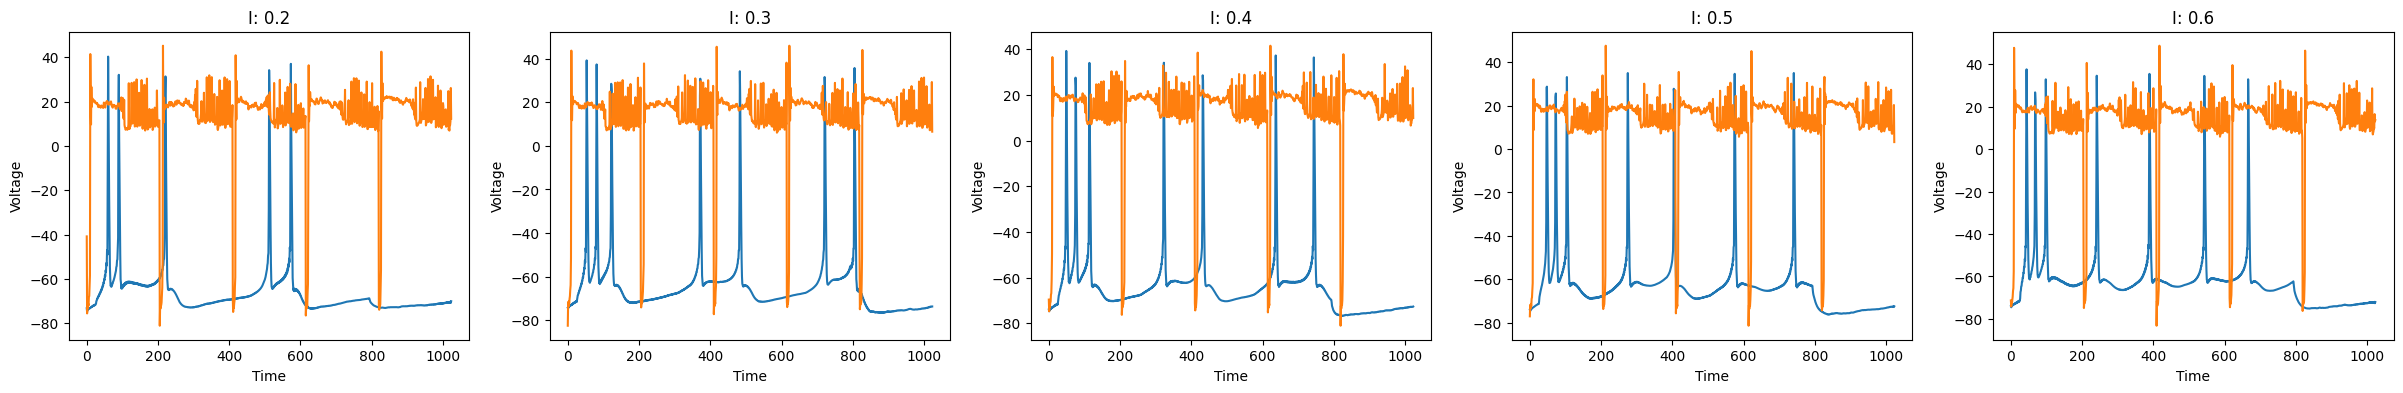

In [13]:
plot_score(naive_opt, data, naive_estimates)

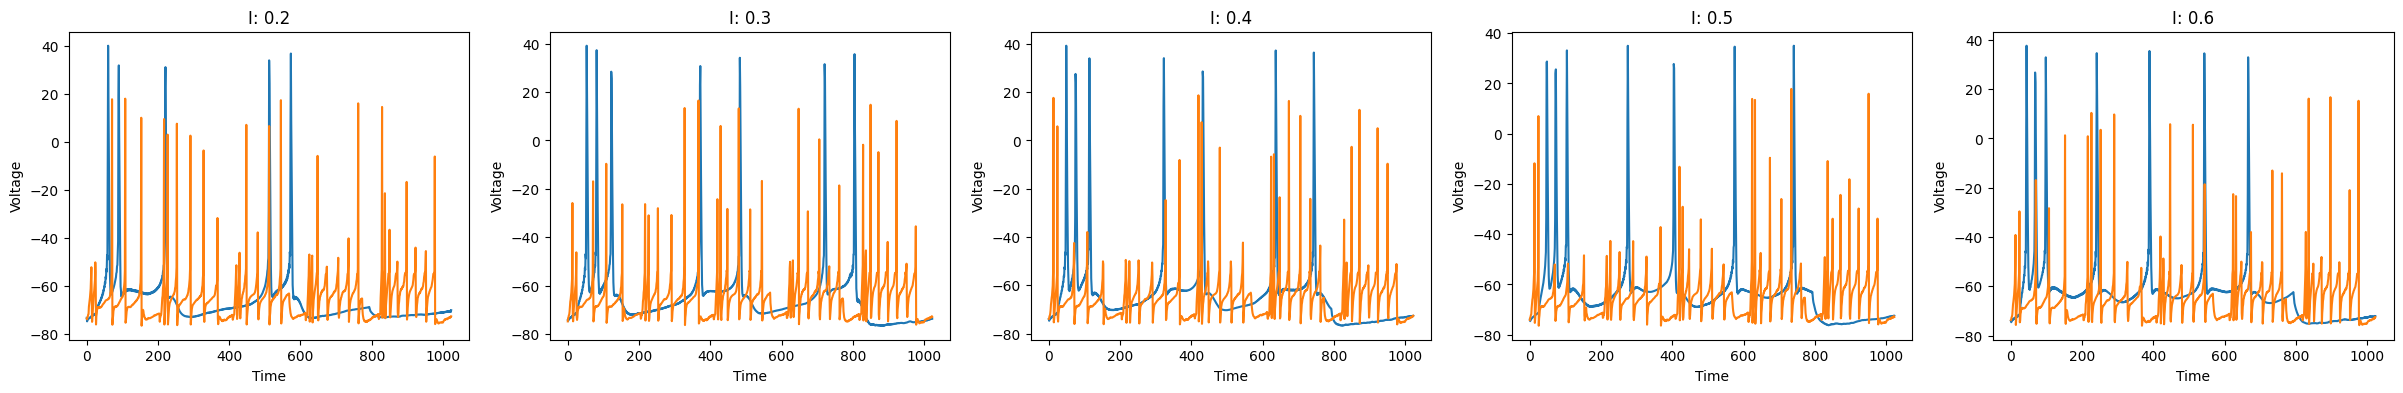

In [14]:
plot_score(linopt, data, linopt_estimates)

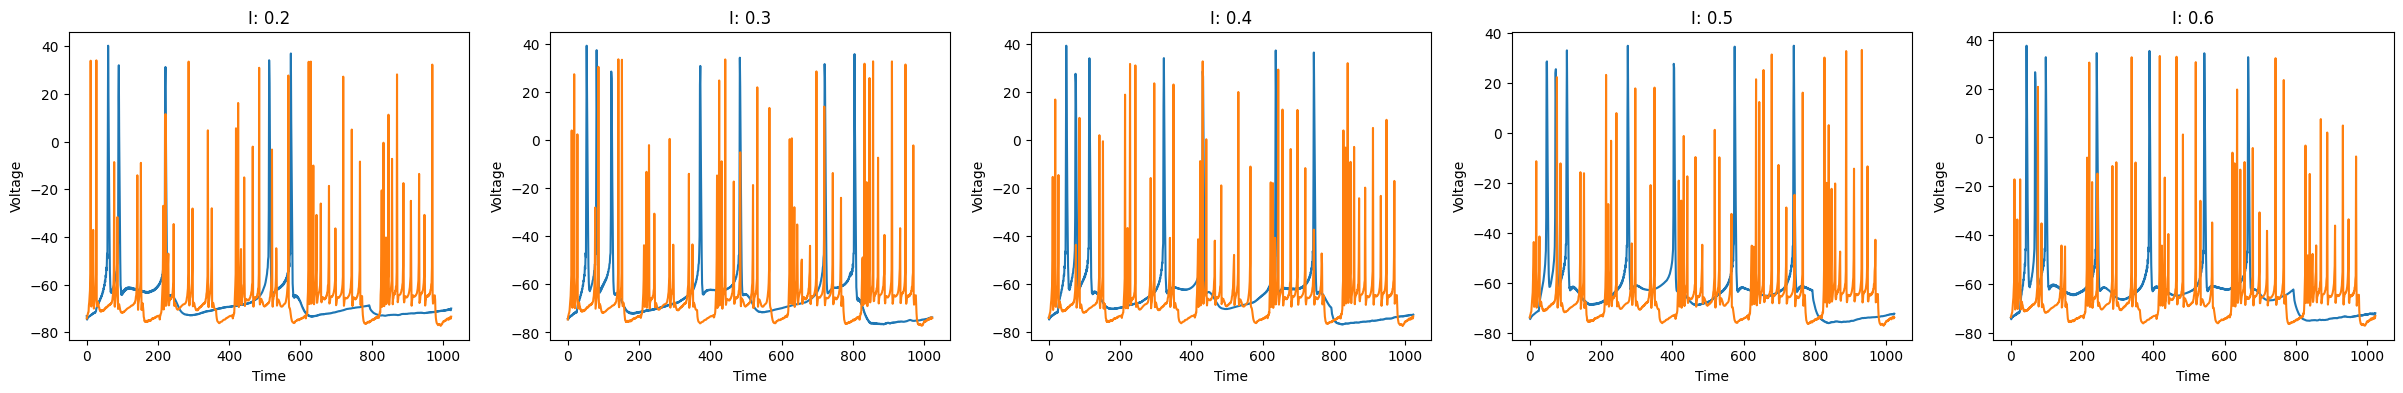

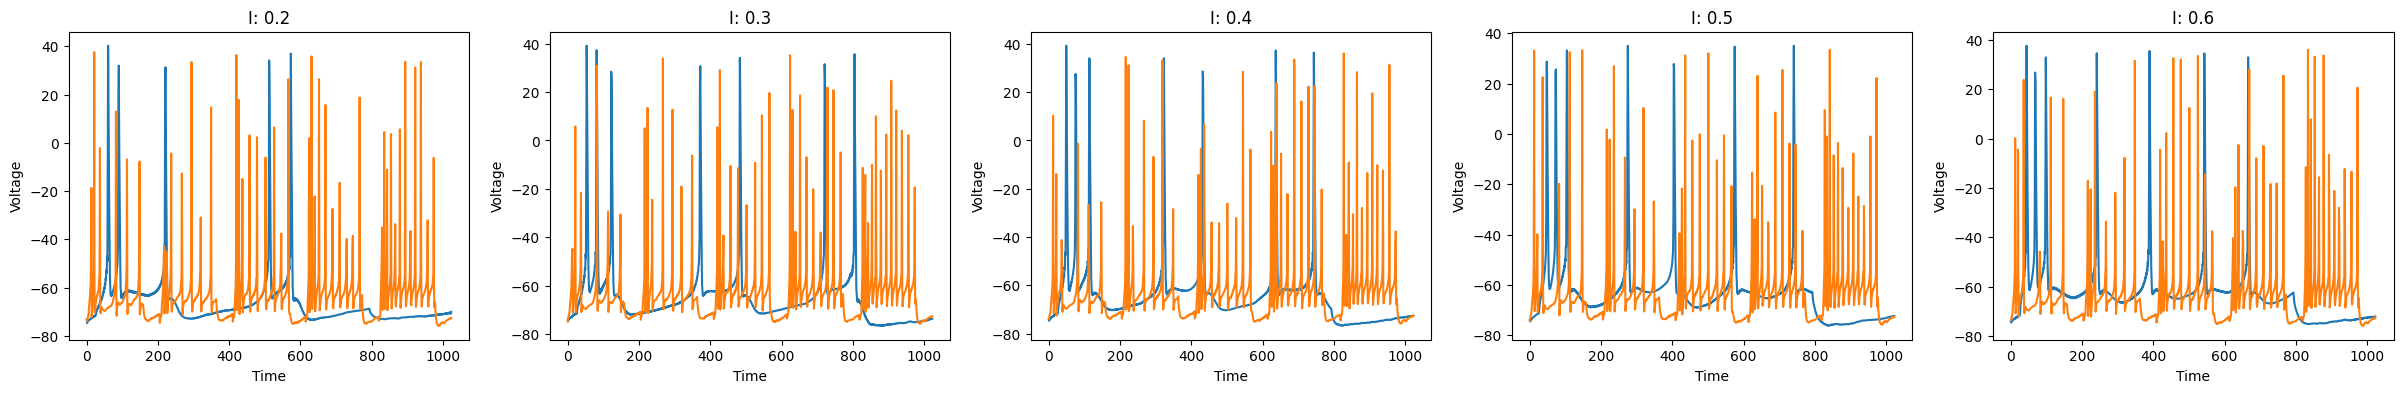

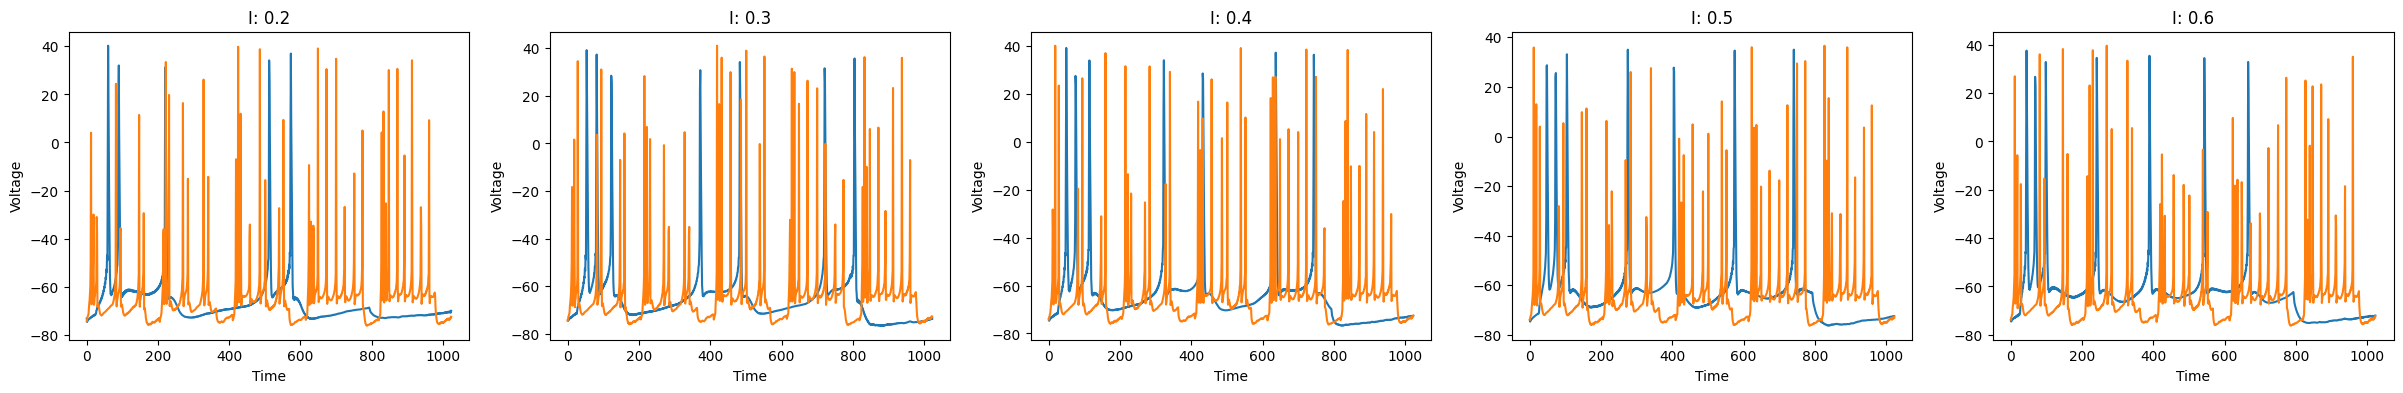

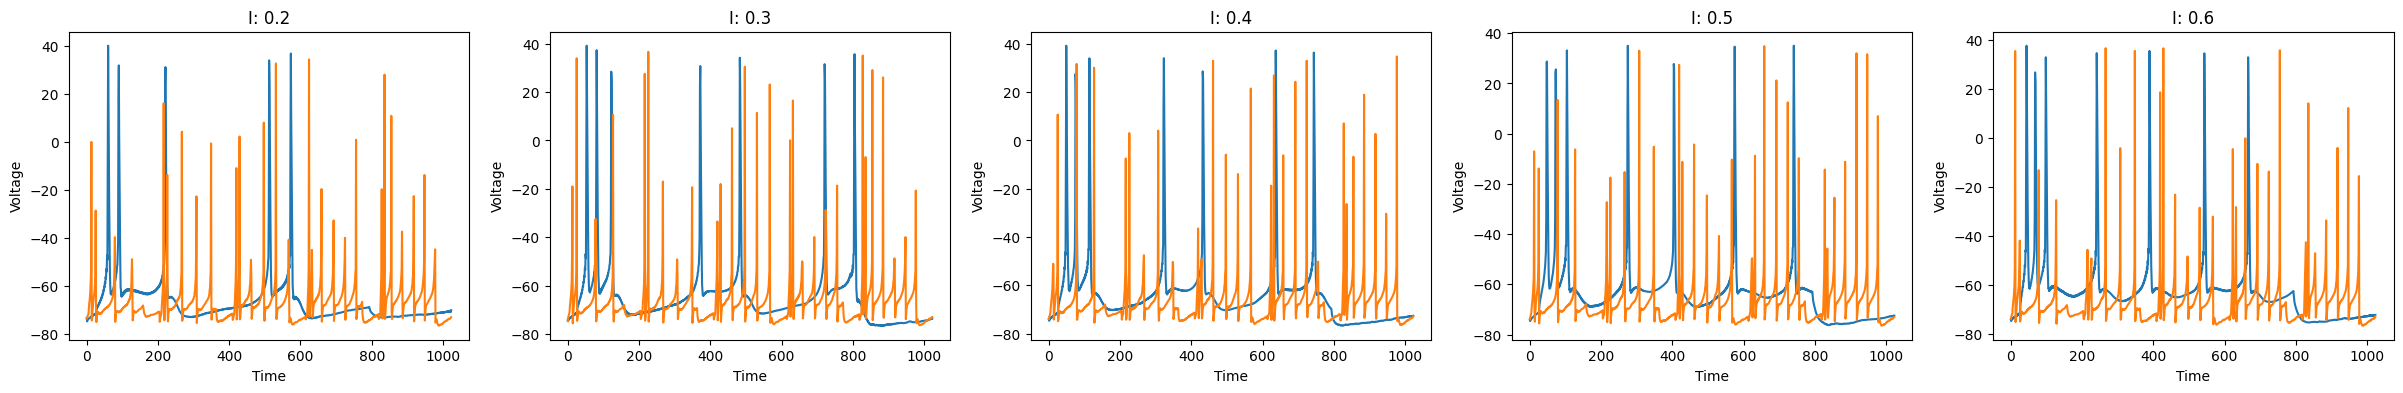

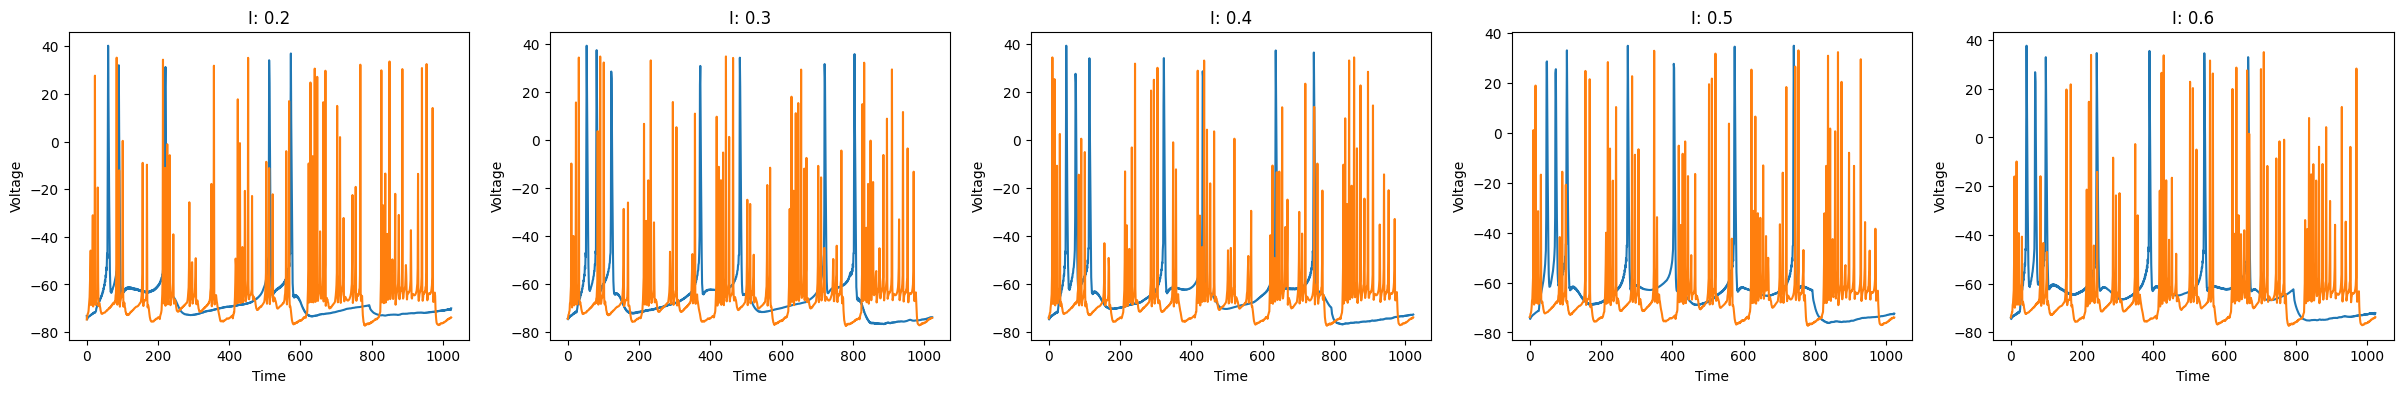

In [20]:
for i in range(5):
    plot_score(sbiopt, data, sbi_estimates[i, 0, :])

In [21]:
mse_score(naive_opt, data, naive_estimates)

tensor([5402.9922, 5989.0928, 6018.1084, 6176.8154, 7912.9976])

In [24]:
mse_score(linopt, data, linopt_estimates)

tensor([483.2308, 316.6722, 271.0412, 290.5836, 265.8335])

In [25]:
for i in range(5):
    print(mse_score(sbiopt, data, sbi_estimates[i, 0, :]))

tensor([602.4763, 417.7005, 384.4935, 379.6758, 377.0655])
tensor([542.7239, 391.6903, 378.5401, 391.3990, 470.3774])
tensor([611.0928, 441.1887, 397.6526, 385.7436, 417.2262])
tensor([522.3242, 376.0885, 349.4330, 331.6140, 272.7339])
tensor([639.3986, 464.9337, 413.7951, 456.0487, 479.7720])


In [26]:
correlation_score(naive_opt, data, naive_estimates)

tensor([ 0.2034,  0.0364, -0.0095,  0.0278, -0.1802])

In [27]:
correlation_score(linopt, data, linopt_estimates)

tensor([ 0.0227, -0.0531,  0.0367,  0.0133, -0.1989])

In [28]:
for i in range(5):
    print(correlation_score(sbiopt, data, sbi_estimates[i, 0, :]))

tensor([-0.0114, -0.0028, -0.0248,  0.0531, -0.1793])
tensor([ 0.0316, -0.0699,  0.0079,  0.0913, -0.1828])
tensor([-0.0605, -0.0199,  0.0077,  0.0354, -0.1719])
tensor([ 0.0061, -0.0786,  0.0229,  0.0324, -0.1523])
tensor([-0.0426,  0.0114,  0.0048,  0.0575, -0.1932])
